# After Training

In this exercise, you will create a deep learning model, save it, and load it to evaluate its performance on unseen data.

In [9]:
# Initial imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pathlib import Path
import pandas as pd

In [10]:
# Read in data
data = Path("../Resources/music.csv")
df = pd.read_csv(data, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [23]:
df.shape

(1059, 70)

In [11]:
# Define the features set 'X', and the target 'y' set.
X = df.iloc[:, 0:67].values
y = df.iloc[:, 68:70].values

In [12]:
# Split the data into traning and testing sets using the train_test_split method from sklearn.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Scale the data for the features set X_tain and X_test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Create a neural network with 1 hidden layer
nn = Sequential()

nn.add(Dense(units=8, input_dim=67, activation="relu"))
nn.add(Dense(units=2, activation="linear"))

In [15]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_1 = nn.fit(X_train_scaled, y_train, epochs=100,  verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 2448.2939 - mse: 2448.2939 - val_loss: 2588.0955 - val_mse: 2588.0955
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2489.1237 - mse: 2489.1237 - val_loss: 2568.0852 - val_mse: 2568.0852
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2436.7358 - mse: 2436.7358 - val_loss: 2548.4536 - val_mse: 2548.4536
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 2375.7889 - mse: 2375.7889 - val_loss: 2529.4783 - val_mse: 2529.4783
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 2409.0522 - mse: 2409.0522 - val_loss: 2508.2810 - val_mse: 2508.2810
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 2323.0072 - mse: 2323.0072 - val_loss: 2485.1028 - val_mse: 2485.1028
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 2253.1127 - mse: 2253.1127 - val_loss: 2460.8765 - val_mse: 2460.8765

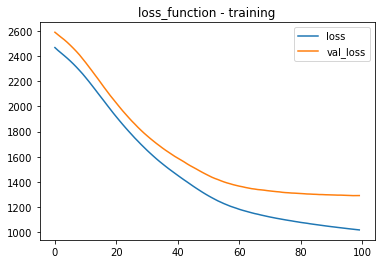

In [22]:
# Plot the train function
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - training")
plt.legend(["loss", "val_loss"])
plt.show()

In [17]:
# Save model as JSON
nn_json = nn.to_json()
file_path = Path("../Resources/model.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = "../Resources/model.h5"
nn.save_weights(file_path)

In [18]:
# Load the model to predict values
from tensorflow.keras.models import model_from_json

# Load json and create model
file_path = Path("../Resources/model.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# Load weights into new model
file_path = "../Resources/model.h5"
loaded_model.load_weights(file_path)

In [19]:
# Predict values using the testing data
from sklearn.metrics import mean_squared_error

y_pred = loaded_model.predict(X_test_scaled)

In [20]:
# Evaluate the model with the MSE metric
print(mean_squared_error(y_test, y_pred))

1291.7821170892587
